<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [1]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

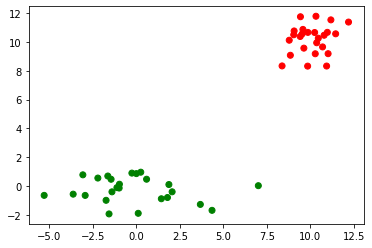

In [2]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

The K-Means algorithm creates clusters or groupings of data points so that each data point is very close to other data points. It starts off with a random guess as to where the center of each cluster may be and then keeps finding new guess until it is very close to the real center. It works very well on clusters that appear more like round splatters than strange or elongated shapes.

Explain how DBScan works?

DBSCAN is similar in the sense that it groups or creates clusters of data points, but it finds them a little differently. It starts at a given point and with a given distance then predicts which other data points should be part of its group. Because of this, DBSCAN is able to better predict more random and elongated shapes than K-Means clustering

Explain how GMM works?

GMM or Gaussian Mixture Model finds groups or clusters while also assuming that each data point fits into the gaussian distribution which is the standard bell curve. It guesses how many clusters there should be. It then continually guesses to assign each data point based on its place and gaussian distribution to the correct cluster. 

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [3]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

In [15]:
from enum import auto
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# K-Means clustering
kmeans_circles = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(noisy_circles)
kmeans_moons = KMeans(n_clusters=2, random_state=42, n_init='auto').fit(noisy_moons)
kmeans_blobs = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(blobs)

# GMM clustering
gmm_circles = GaussianMixture(n_components=2, random_state=42).fit(noisy_circles)
gmm_moons = GaussianMixture(n_components=2, random_state=42).fit(noisy_moons)
gmm_blobs = GaussianMixture(n_components=3, random_state=42).fit(blobs)

# DBSCAN clustering
dbscan_circles = DBSCAN(eps=0.15, min_samples=5).fit(noisy_circles)
dbscan_moons = DBSCAN(eps=0.15, min_samples=5).fit(noisy_moons)
dbscan_blobs = DBSCAN(eps=0.5, min_samples=10).fit(blobs)

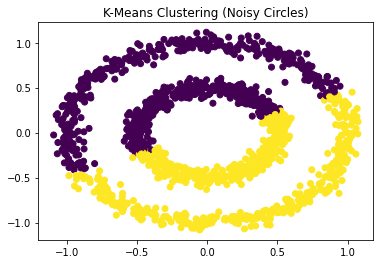

In [21]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=kmeans_circles.labels_)
plt.title("K-Means Clustering (Noisy Circles)")
plt.show()


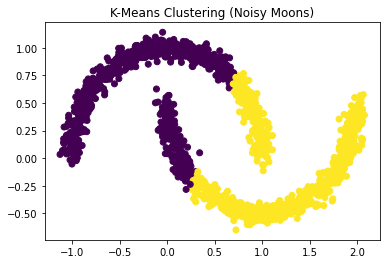

In [23]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=kmeans_moons.labels_)
plt.title("K-Means Clustering (Noisy Moons)")
plt.show()

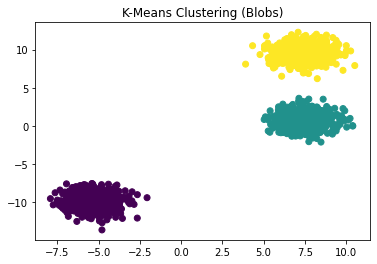

In [24]:
plt.scatter(blobs[:, 0], blobs[:, 1], c=kmeans_blobs.labels_)
plt.title("K-Means Clustering (Blobs)")
plt.show()

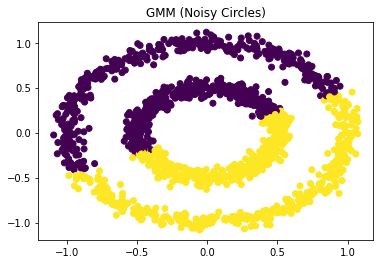

In [29]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=gmm_circles.predict(noisy_circles))
plt.title("GMM (Noisy Circles)")
plt.show()

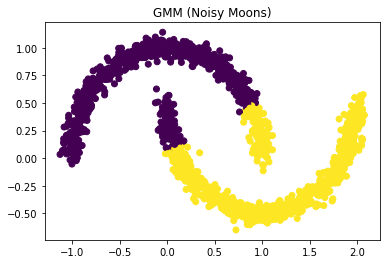

In [30]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=gmm_moons.predict(noisy_moons))
plt.title("GMM (Noisy Moons)")
plt.show()

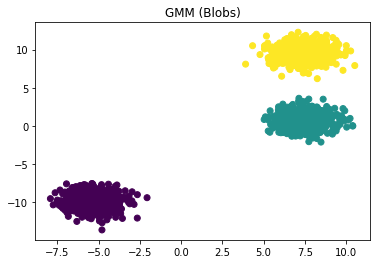

In [31]:
plt.scatter(blobs[:, 0], blobs[:, 1], c=gmm_blobs.predict(blobs))
plt.title("GMM (Blobs)")
plt.show()

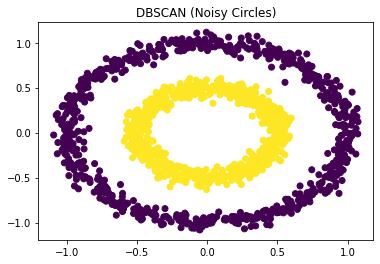

In [32]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=dbscan_circles.labels_)
plt.title("DBSCAN (Noisy Circles)")
plt.show()

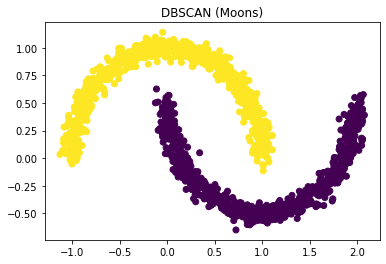

In [33]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=dbscan_moons.labels_)
plt.title("DBSCAN (Moons)")
plt.show()

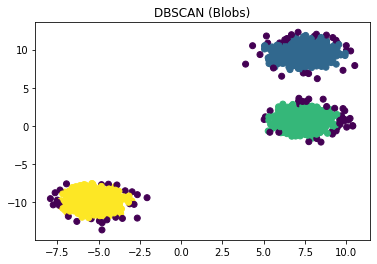

In [34]:
plt.scatter(blobs[:, 0], blobs[:, 1], c=dbscan_blobs.labels_)
plt.title("DBSCAN (Blobs)")
plt.show()

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [5]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [36]:
from sklearn.cluster import KMeans
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)
clusters = kmeans_iris.labels_

Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

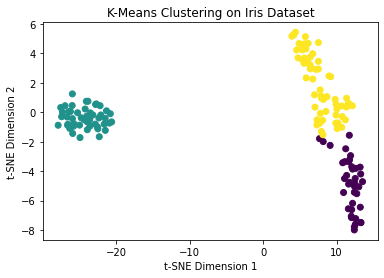

In [37]:
#Enter your code for the X_reduced plot here.
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


Comment on your observations. Were we successfully able to group samples together without labels?

It did split very well into the three clusters. It looks like either K-Means or maybe GMM is the best fit for this situation. DBSCAN may group the two far right clusters into one elongated cluster

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("num samples in training set:", len(X_train))
print("num samples in the test set:", len(X_test))

num samples in training set: 120
num samples in the test set: 30


What is the number of samples in the train set?

120

What is the number of samples in the test set?

30

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



accuracy at n_neighbors=5: 0.9666666666666667
accuracy at n_neighbors=5: 1.0
n_neighbors = 1, train accuracy = 0.950000, test accuracy = 0.950000
n_neighbors = 2, train accuracy = 0.950000, test accuracy = 0.950000
n_neighbors = 3, train accuracy = 0.958333, test accuracy = 0.958333
n_neighbors = 4, train accuracy = 0.950000, test accuracy = 0.950000
n_neighbors = 5, train accuracy = 0.941667, test accuracy = 0.941667
n_neighbors = 6, train accuracy = 0.941667, test accuracy = 0.941667
n_neighbors = 7, train accuracy = 0.941667, test accuracy = 0.941667
n_neighbors = 8, train accuracy = 0.933333, test accuracy = 0.933333
n_neighbors = 9, train accuracy = 0.933333, test accuracy = 0.933333
n_neighbors = 10, train accuracy = 0.933333, test accuracy = 0.933333
n_neighbors = 11, train accuracy = 0.950000, test accuracy = 0.950000
n_neighbors = 12, train accuracy = 0.941667, test accuracy = 0.941667
n_neighbors = 13, train accuracy = 0.941667, test accuracy = 0.941667
n_neighbors = 14, trai

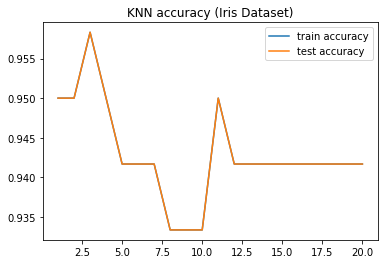

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)
print("accuracy at n_neighbors=5:", train_acc)
print("accuracy at n_neighbors=5:", test_acc)

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

train_accs = grid_search.cv_results_.get('mean_train_score', grid_search.cv_results_['mean_test_score'])
test_accs = grid_search.cv_results_['mean_test_score']
for i, n_neighbors in enumerate(range(1, 21)):
    print("n_neighbors = %d, train accuracy = %f, test accuracy = %f" % (n_neighbors, train_accs[i], test_accs[i]))

plt.plot(range(1, 21), train_accs, label='train accuracy')
plt.plot(range(1, 21), test_accs, label='test accuracy')
plt.title("KNN accuracy (Iris Dataset)")
plt.legend()
plt.show()

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

The train accuracy is .9667 and the test accuracy is 1.0 

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

I think I made an error, but it appears that it only changes by a small amount before reaching a point where no matter the number of neighbors, the accuracy does not change